# Examples for running FLORIS_loads

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris("Max test01 5WTs 1st pitch control.json")

## Calculate Wake

In [3]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.026100873947143555 s


## Compute Velocities at each Turbine

In [4]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.4739223]
	Ct - [0.77701827]
	power - [4552704.04749227]
	ai - [0.26389529]
	average velocity - 10.794645996274884
(806.0, 0.0):
	Cp - [0.48017432]
	Ct - [0.81156956]
	power - [2560583.16727906]
	ai - [0.28295713]
	average velocity - 8.871579834277789
(1612.0, 0.0):
	Cp - [0.48009331]
	Ct - [0.81157619]
	power - [2225274.44736286]
	ai - [0.28296094]
	average velocity - 8.466559279648344
(2418.0, 0.0):
	Cp - [0.48006209]
	Ct - [0.81157874]
	power - [2104299.22107983]
	ai - [0.28296241]
	average velocity - 8.310446148958272
(3224.0, 0.0):
	Cp - [0.48004738]
	Ct - [0.81157995]
	power - [2048866.55758369]
	ai - [0.28296311]
	average velocity - 8.236907104137439


## Visualization Manager for FLORIS 

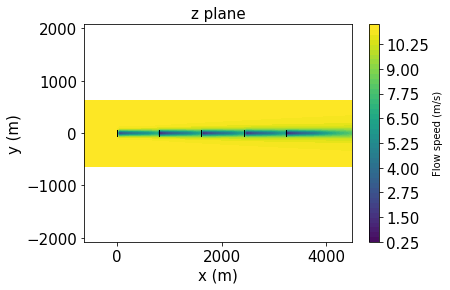

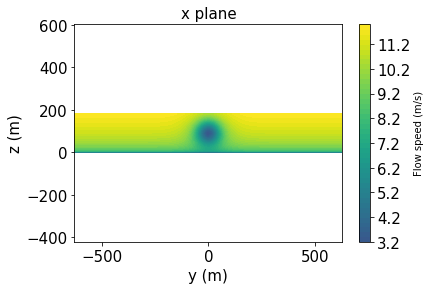

In [5]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 50)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Test Blade Pitch Angle 

In [6]:
turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
turbines[0].blade_pitch = 1.0
floris.farm.flow_field.calculate_wake()

In [7]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tai -", turbine.aI)
    print("\tblade pitch -", turbine.blade_pitch)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.46000712]
	Ct - [0.72047276]
	power - [4419028.75279381]
	ai - [0.23564832]
	blade pitch - 1.0
	average velocity - 10.794645996274884
(806.0, 0.0):
	Cp - [0.48019815]
	Ct - [0.81156761]
	power - [2665311.79955052]
	ai - [0.282956]
	blade pitch - 0.0
	average velocity - 8.990768675341238
(1612.0, 0.0):
	Cp - [0.48010013]
	Ct - [0.81157563]
	power - [2252305.11840018]
	ai - [0.28296062]
	blade pitch - 0.0
	average velocity - 8.500662577247375
(2418.0, 0.0):
	Cp - [0.48006495]
	Ct - [0.81157851]
	power - [2115193.09187352]
	ai - [0.28296228]
	blade pitch - 0.0
	average velocity - 8.324745887327365
(3224.0, 0.0):
	Cp - [0.4800488]
	Ct - [0.81157983]
	power - [2054165.57799117]
	ai - [0.28296304]
	blade pitch - 0.0
	average velocity - 8.243993964357676


## Sweep Pitch

In [8]:
pitch_angles = np.arange(0,2,0.25)
pow_0 = np.zeros_like(pitch_angles)
pow_1 = np.zeros_like(pitch_angles)
pow_2 = np.zeros_like(pitch_angles)
pow_3 = np.zeros_like(pitch_angles)
pow_4 = np.zeros_like(pitch_angles)
for p_idx, p in enumerate(pitch_angles):
    turbines[0].blade_pitch = p
    floris.farm.flow_field.calculate_wake()
    pow_0[p_idx] = turbines[0].power
    pow_1[p_idx] = turbines[1].power
    pow_2[p_idx] = turbines[2].power
    pow_3[p_idx] = turbines[3].power
    pow_4[p_idx] = turbines[4].power

pow_t = pow_0 + pow_1 + pow_2 + pow_3 + pow_4
#pow_t = pow_0 + pow_1

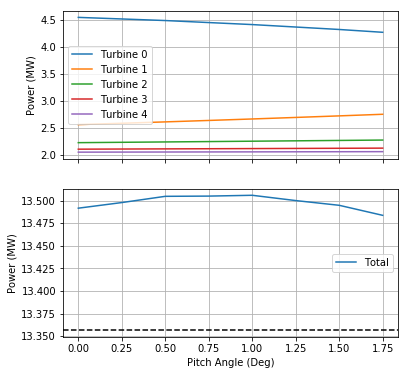

In [9]:
fig, axarr = plt.subplots(2,1,sharex=True,figsize=(6,6))

ax = axarr[0]
ax.plot(pitch_angles,pow_0/1E6,label='Turbine 0')
ax.plot(pitch_angles,pow_1/1E6,label='Turbine 1')
ax.plot(pitch_angles,pow_2/1E6,label='Turbine 2')
ax.plot(pitch_angles,pow_3/1E6,label='Turbine 3')
ax.plot(pitch_angles,pow_4/1E6,label='Turbine 4')
ax.grid(True)
ax.set_ylabel('Power (MW)')
ax.legend()

ax = axarr[1]
ax.plot(pitch_angles,pow_t/1E6,label='Total')
ax.axhline(pow_t[0] * 0.99/1E6,color='k',ls='--')
ax.grid(True)
ax.set_ylabel('Power (MW)')
ax.set_xlabel('Pitch Angle (Deg)')
ax.legend()
# fig.savefig('aligned_power.png')
#fig.savefig('Max_offset_power_2WTs.png')
fig.savefig('Max_offset_power_5WTs.png')

## Calculate WF operation status in optimal pitch angle

In [10]:
pow_max = max(pow_t)
max_index = np.argwhere(pow_t == max(pow_t))
pitch_angles_max = pitch_angles[max_index[0,0]]
print('The maximum power of WF is',round(pow_max/1e6,2),'MW')
print('The increase power of WF is',round((pow_max-pow_t[0])/1e6,2),'MW')
print('The corresponding pitch angle is',pitch_angles_max,'degree')

The maximum power of WF is 13.51 MW
The increase power of WF is 0.01 MW
The corresponding pitch angle is 1.0 degree
